In [214]:
#%config IPCompleter.greedy = True
%config Completer.use_jedi = False

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [394]:
#Theme
sns.set_theme(style='darkgrid')

In [407]:
#First of all get all data and create a dataframe for them, I have included year, month and day
#Next time, i will use some formula for making those calculations
myfile = "./data.xlsx"
main_df = pd.read_excel(myfile)
main_df

,Date,Program,Year,Month,Day,Visits,Revenue
0,2015-01-01 23:59:59,SEO,2015,1,1,0,2317.14
1,2015-01-01 23:59:59,SEO,2015,1,1,0,903.10
2,2015-01-01 23:59:59,SEO,2015,1,1,2844,0.00
3,2015-01-01 23:59:59,Direct,2015,1,1,0,24.31
4,2015-01-01 23:59:59,Direct,2015,1,1,937,0.00
...,...,...,...,...,...,...,...
100028,2021-01-31 23:59:59,Organic Social,2021,1,31,211,0.00
100029,2021-01-31 23:59:59,::unspecified::,2021,1,31,16,0.00
100030,2021-01-31 23:59:59,Other,2021,1,31,0,0.00
100031,2021-01-31 23:59:59,Lenovo Social,2021,1,31,3,0.00


In [236]:
main_df.dtypes

Date       datetime64[ns]
Program            object
Year                int64
Month               int64
Day                 int64
Visits              int64
Revenue           float64
dtype: object

In [408]:
#Make a copy of the main dataframe
data = main_df[['Program','Year','Month','Day','Visits','Revenue']]

In [409]:
#For this early stage I discard type of Traffic and just sum all of them
data = data.groupby(['Year','Month','Day'])[['Visits','Revenue']].sum()

In [410]:
#Reset Index after having made a groupby
data = data.reset_index()

In [220]:
#Lets check it out how this looks like and we can see that we have 2223 rows of data. Original one was 100,033 rows
data

,Year,Month,Day,Visits,Revenue
0,2015,1,1,3834,3244.55
1,2015,1,2,6189,4791.64
2,2015,1,3,5523,534.93
3,2015,1,4,5086,848.43
4,2015,1,5,6185,2393.52
...,...,...,...,...,...
2218,2021,1,27,39461,36720.96
2219,2021,1,28,41043,30386.56
2220,2021,1,29,39174,65198.11
2221,2021,1,30,29582,33134.80


In [52]:
data['Revenue'].describe()

count      2223.000000
mean      25438.899731
std       39174.756758
min           0.000000
25%        9351.615000
50%       18048.570000
75%       31929.080000
max      858333.560000
Name: Revenue, dtype: float64

In [414]:
sorted(data['Revenue'], reverse=True)

[858333.5600000034,
 784321.290000003,
 590327.1899999998,
 563812.3999999989,
 529061.6699999995,
 334605.57000000076,
 311593.59999999957,
 304644.9999999996,
 206742.70999999996,
 192917.33000000007,
 191231.44000000012,
 187432.28999999983,
 186791.86000000004,
 171407.57999999987,
 169560.74000000005,
 167811.78999999986,
 153453.7500000001,
 139222.25999999998,
 132259.49000000002,
 132244.95,
 131383.15999999992,
 130645.76999999989,
 124783.69999999997,
 124024.70000000022,
 117069.57999999999,
 115680.39000000003,
 112899.65000000001,
 111940.03999999998,
 109272.9500000002,
 107702.02999999996,
 107599.70999999995,
 104098.95000000004,
 101380.1800000001,
 100517.25999999995,
 98058.94000000002,
 97243.22999999998,
 95266.08000000016,
 94826.27,
 93087.03000000006,
 92653.50999999995,
 92156.65000000002,
 91074.79,
 90887.97000000009,
 90056.15,
 89374.43000000004,
 88473.35000000008,
 87368.04000000008,
 86168.33999999995,
 84098.13000000002,
 83723.62,
 82678.79,
 81664.65,

(array([ 54., 100., 120., 154., 177., 143., 126., 110., 124., 115.,  95.,
         81.,  79.,  63.,  61.,  66.,  61.,  51.,  55.,  41.,  35.,  26.,
         35.,  34.,  32.,  13.,  15.,  17.,  11.,  10.,  14.,   9.,   6.,
         13.,   2.,   6.,   5.,   4.,   5.,   1.,   3.,   2.,   1.,   2.,
          2.,   3.,   3.,   2.,   1.]),
 array([    0,  2000,  4000,  6000,  8000, 10000, 12000, 14000, 16000,
        18000, 20000, 22000, 24000, 26000, 28000, 30000, 32000, 34000,
        36000, 38000, 40000, 42000, 44000, 46000, 48000, 50000, 52000,
        54000, 56000, 58000, 60000, 62000, 64000, 66000, 68000, 70000,
        72000, 74000, 76000, 78000, 80000, 82000, 84000, 86000, 88000,
        90000, 92000, 94000, 96000, 98000]),
 <a list of 49 Patch objects>)

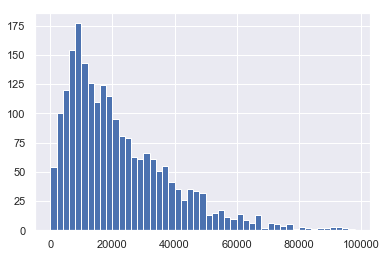

In [391]:
plt.hist(data['Revenue'], bins=range(0,100000,2000))

In [54]:
data['Visits'].describe()

count      2223.000000
mean      12871.529015
std        8188.285452
min         245.000000
25%        7774.000000
50%        9969.000000
75%       14886.000000
max      109148.000000
Name: Visits, dtype: float64

In [395]:
data['Visits'].max()

109148

(array([  1.,   9., 159., 449., 501., 309., 190.,  92.,  84.,  88.,  77.,
         48.,  55.,  28.,  25.,  31.,  10.,  10.,   7.,   9.,  15.,  11.,
          6.,   2.,   2.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.]),
 array([     0,   2000,   4000,   6000,   8000,  10000,  12000,  14000,
         16000,  18000,  20000,  22000,  24000,  26000,  28000,  30000,
         32000,  34000,  36000,  38000,  40000,  42000,  44000,  46000,
         48000,  50000,  52000,  54000,  56000,  58000,  60000,  62000,
         64000,  66000,  68000,  70000,  72000,  74000,  76000,  78000,
         80000,  82000,  84000,  86000,  88000,  90000,  92000,  94000,
         96000,  98000, 100000, 102000, 104000, 106000, 108000, 110000,
        112000, 114000, 116000, 118000]),
 <a list of 59 Patch objects>)

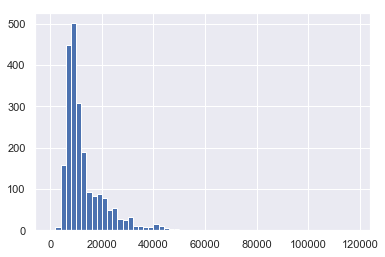

In [398]:
plt.hist(data['Visits'], bins=range(0,120000,2000))

In [221]:
aux = pd.DataFrame(np.log(data[data['Revenue'] != 0]))

In [222]:
aux.corr()

,Year,Month,Day,Visits,Revenue
Year,1.000000,-0.063566,0.001097,0.732171,0.604629
Month,-0.063566,1.000000,0.005938,0.092400,0.109626
Day,0.001097,0.005938,1.000000,0.054783,0.076481
Visits,0.732171,0.092400,0.054783,1.000000,0.675325
Revenue,0.604629,0.109626,0.076481,0.675325,1.000000


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   2.,   0.,   0.,   2.,
          1.,   0.,   2.,   4.,   2.,   2.,   5.,   6.,   8.,   8.,  12.,
         23.,  20.,  18.,  29.,  32.,  38.,  45.,  72.,  69.,  95., 104.,
        102., 100., 109., 133., 140., 132., 126., 111., 129., 128.,  99.,
        101.,  59.,  43.,  30.,  19.,  12.,   7.,   7.,   7.,   1.,   3.,
          5.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   3.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 2.        ,  2.13131313,  2.26262626,  2.39393939,  2.52525253,
         2.65656566,  2.78787879,  2.91919192,  3.05050505,  3.18181818,
         3.31313131,  3.44444444,  3.57575758,  3.70707071,  3.83838384,
         3.96969697,  4.1010101 ,  4.23232323,  4.36363636,  4.49494949,
         4.62626263,  4.75757576,  4.888

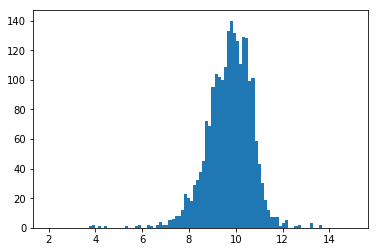

In [116]:
plt.hist(aux['Revenue'], bins=np.linspace(start=2,stop=15,num=100))

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   3.,   2.,   3.,   6.,   6.,  12.,  17.,  32.,  36.,  33.,
         31.,  38.,  55.,  75., 101., 126., 105., 106.,  97., 120., 128.,
         95.,  95.,  77.,  60.,  62.,  74.,  40.,  34.,  32.,  32.,  38.,
         41.,  46.,  39.,  42.,  33.,  27.,  35.,  26.,  22.,  17.,  25.,
         17.,   8.,   7.,   9.,   9.,  11.,  13.,  10.,   2.,   1.,   2.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 7.        ,  7.05050505,  7.1010101 ,  7.15151515,  7.2020202 ,
         7.25252525,  7.3030303 ,  7.35353535,  7.4040404 ,  7.45454545,
         7.50505051,  7.55555556,  7.60606061,  7.65656566,  7.70707071,
         7.75757576,  7.80808081,  7.85858586,  7.90909091,  7.95959596,
         8.01010101,  8.06060606,  8.111

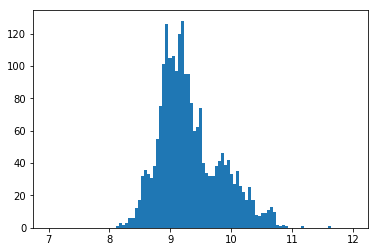

In [152]:
plt.hist(aux['Visits'], bins=np.linspace(start=7,stop=12,num=100))

(array([  2.,   2.,   2.,   3.,   2.,   3.,   3.,   5.,  11.,   6.,  21.,
         22.,  27.,  18.,  24.,  15.,  30.,  25.,  37.,  47.,  54.,  69.,
         83.,  76.,  76.,  61.,  80.,  69.,  68., 100.,  86.,  70.,  60.,
         64.,  52.,  46.,  42.,  48.,  42.,  48.,  28.,  22.,  24.,  21.,
         19.,  28.,  25.,  29.,  28.,  32.,  25.,  29.,  31.,  20.,  19.,
         21.,  24.,  19.,  22.,  15.,  10.,  12.,  15.,  20.,   7.,   6.,
          2.,   9.,   5.,   6.,   6.,   7.,  12.,   6.,   6.,   1.,   1.,
          2.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 8.14815644,  8.18267948,  8.21720251,  8.25172555,  8.28624858,
         8.32077162,  8.35529466,  8.38981769,  8.42434073,  8.45886376,
         8.4933868 ,  8.52790984,  8.56243287,  8.59695591,  8.63147894,
         8.66600198,  8.70052502,  8.73504805,  8.76957109,  8.80409412,
         8.83861716,  8.87

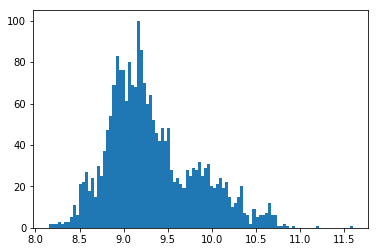

In [154]:
plt.hist(aux['Visits'], bins=100)

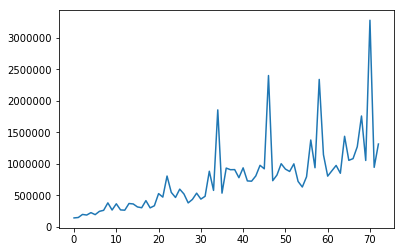

In [149]:
plt.plot(data.groupby(['Year','Month'])[['Revenue']].sum().reset_index().index,data.groupby(['Year','Month'])[['Revenue']].sum())

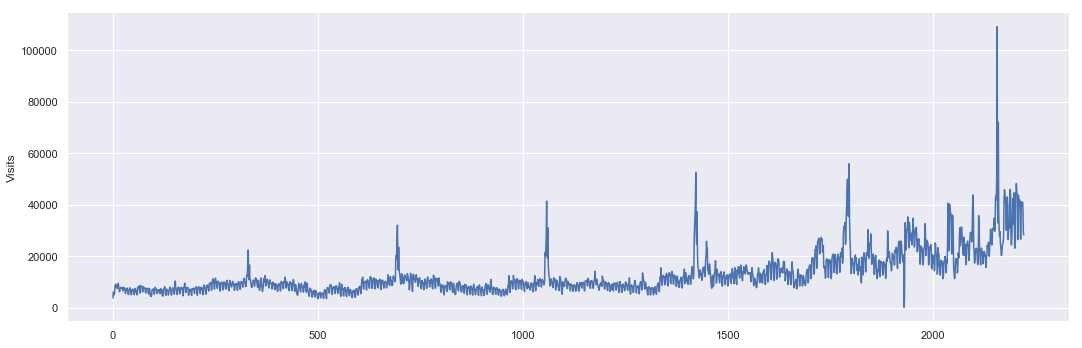

In [168]:
sns.relplot(data=data, x=data.index, y='Visits', kind='line', aspect=3)

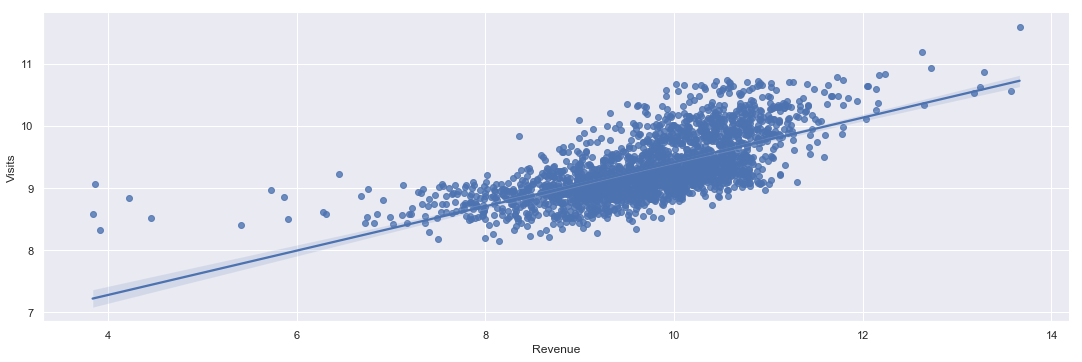

In [173]:
sns.lmplot(x='Revenue', y="Visits", data=aux, aspect=3)

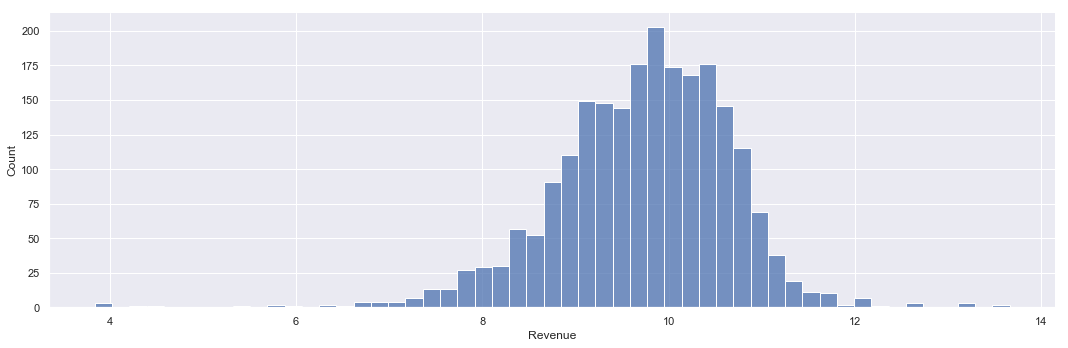

In [179]:
sns.displot(data=aux, x='Revenue', aspect=3)

/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


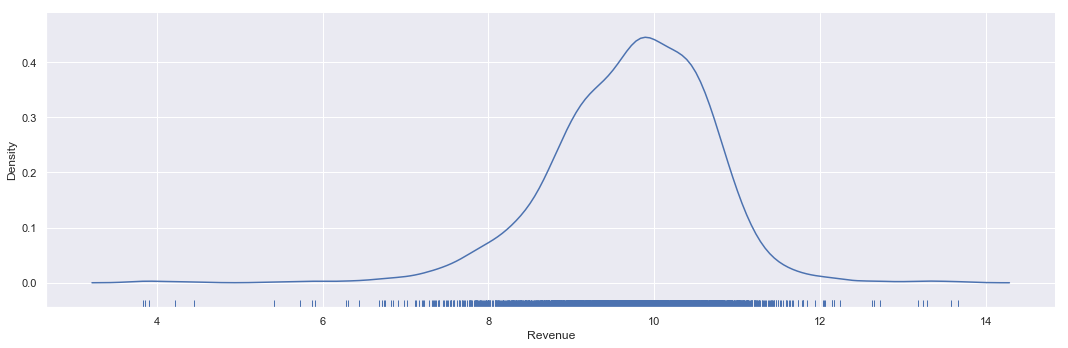

In [180]:
sns.displot(data=aux, x='Revenue', kind='kde', aspect=3, rug=True)

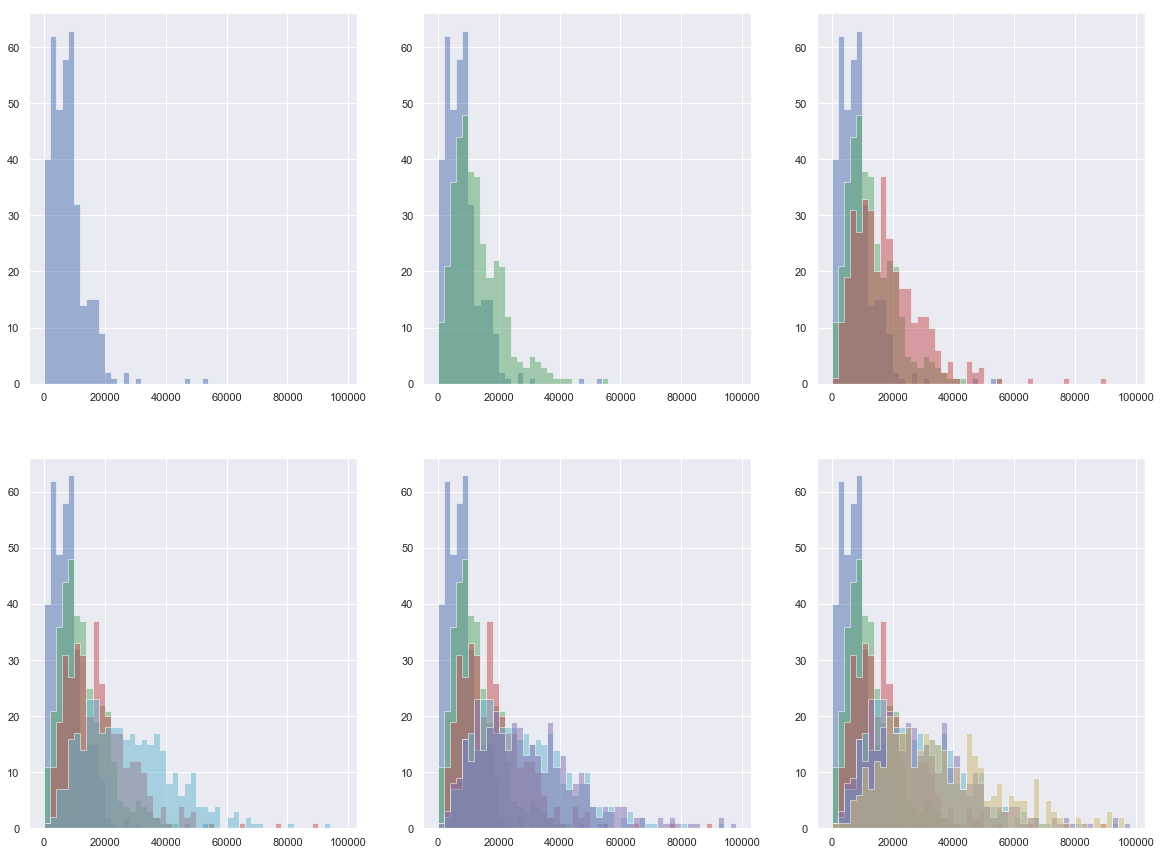

In [402]:
#It seems the Revenue distribution follows a Gamma Distribution even when yo
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(20, 15)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

def draw_hist(df, col, col_con, lista ,ax):
    m = 0
    k = 0
    for i in range(len(ax)):
        for j in range(len(ax[i])):
            while k <= m:
                ax[i,j].hist(df[df[col_con] == lista[k]][col], bins=range(0,100000,2000), color=colors[k], histtype='stepfilled', alpha=0.5)
                k += 1
            k = 0
            m += 1
            
draw_hist(data, 'Revenue', 'Year', data['Year'].unique(), ax)

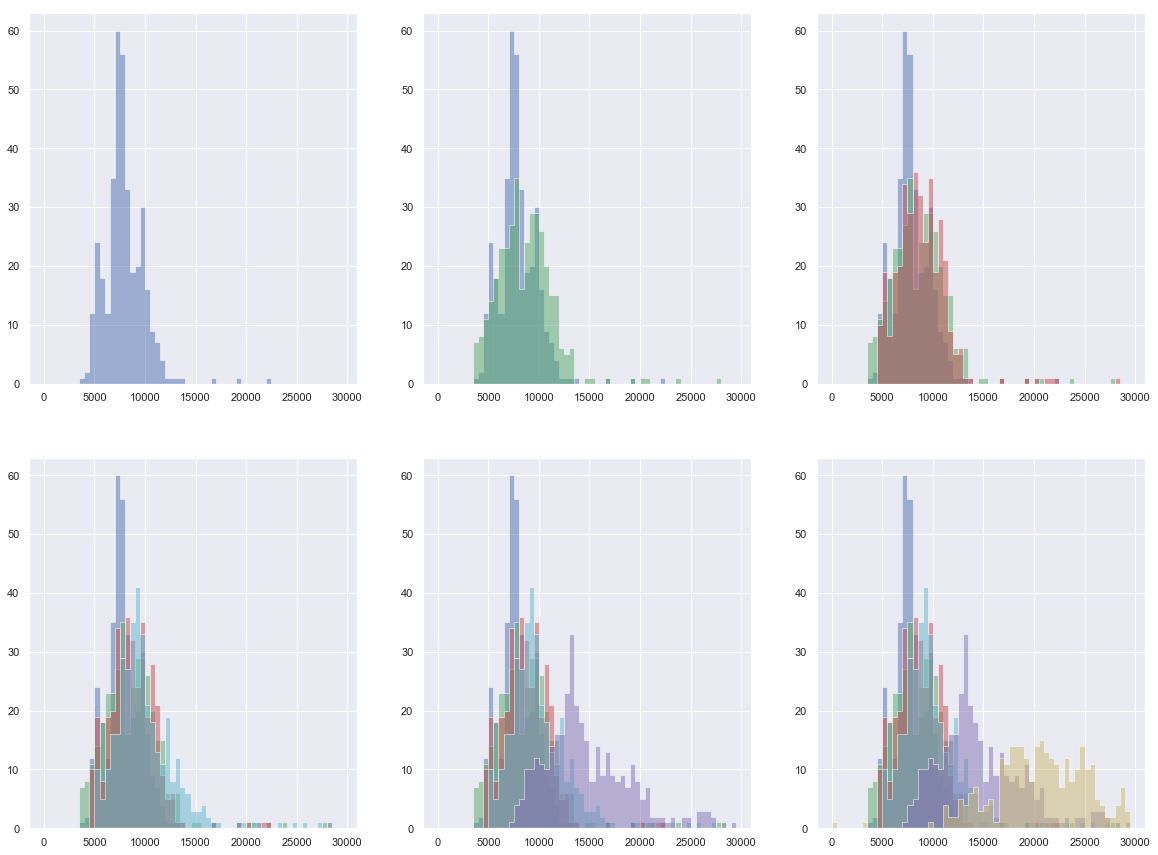

In [380]:
#Traffic seems a Norm Distribution but when you add more years it seems a Gamma Distribution but every year
#Seems centrated. Further analysis are needed
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(20, 15)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

def draw_hist(df, col, col_con, lista ,ax):
    m = 0
    k = 0
    for i in range(len(ax)):
        for j in range(len(ax[i])):
            while k <= m:
                ax[i,j].hist(df[df[col_con] == lista[k]][col], bins=range(0,30000,500), color=colors[k], histtype='stepfilled', alpha=0.5)
                k += 1
            k = 0
            m += 1
            
draw_hist(data, 'Visits', 'Year', data['Year'].unique(), ax)

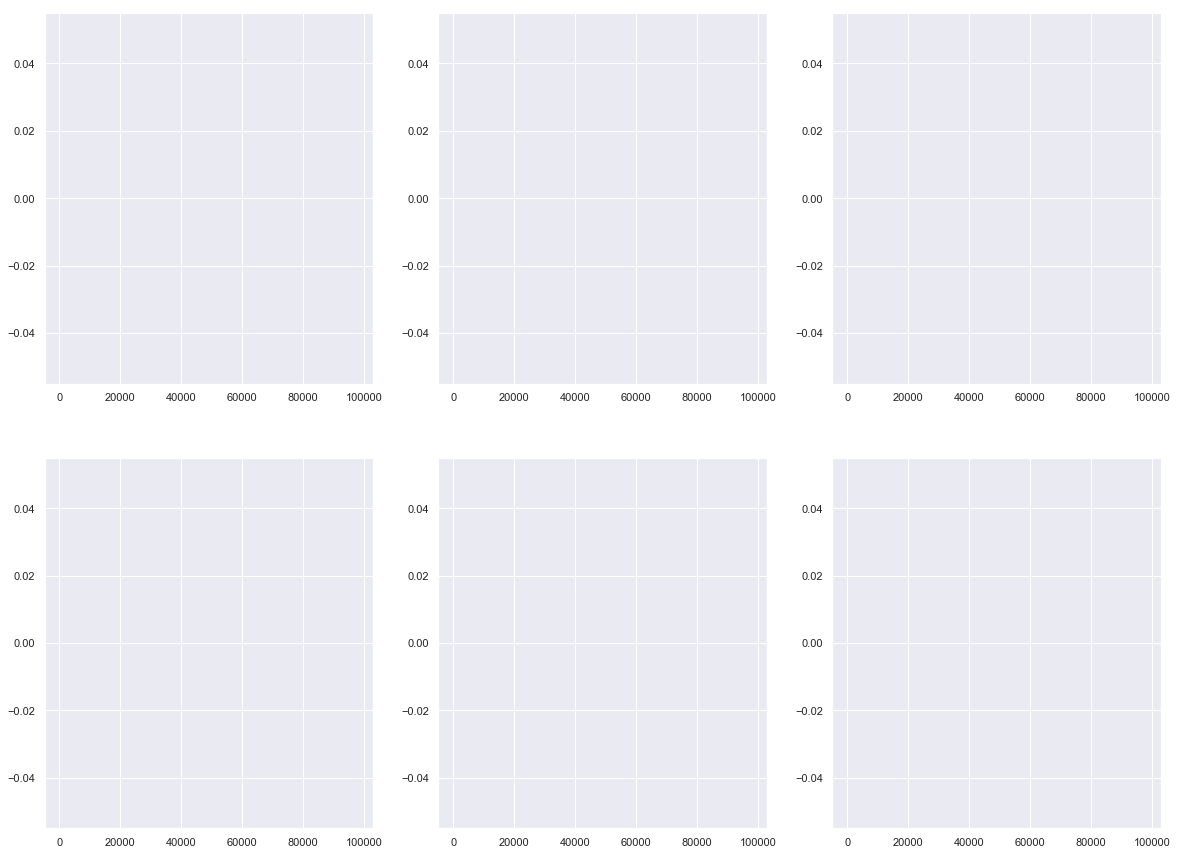

In [378]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(20, 15)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
draw_hist(data, 'Visits', 'Year', data['Visits'].unique(), ax)

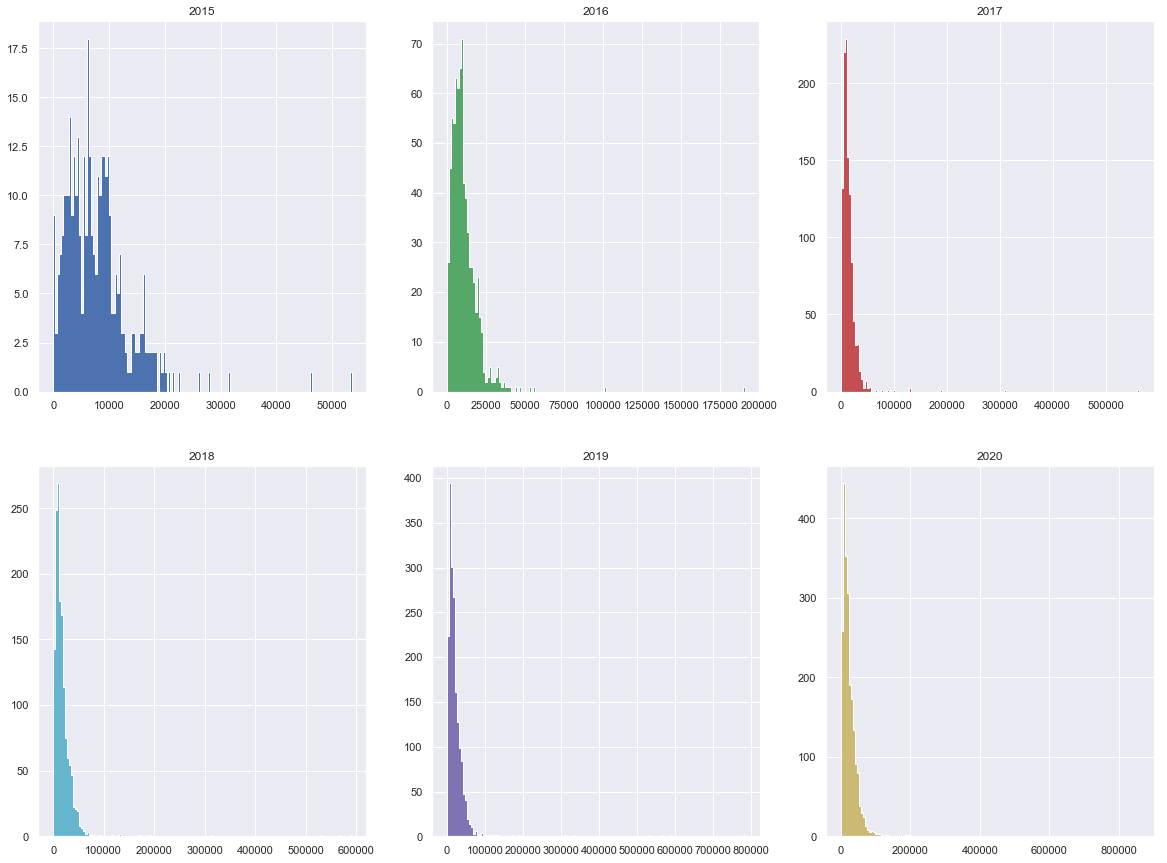

In [362]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(20, 15)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

def draw_hist(df, col, col_con, lista ,ax):
    k = 0
    for i in range(len(ax)):
        for j in range(len(ax[i])):
            ax[i,j].hist(df[df[col_con] <= lista[k]][col], bins=150, color=colors[k], histtype='stepfilled')
            ax[i,j].set(title=lista[k])
            k += 1

draw_hist(data, 'Revenue', 'Year', data['Year'].unique(), ax) 

/home/dsc/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: F

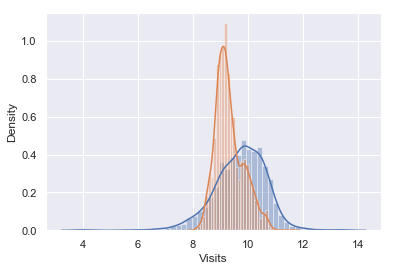

In [197]:
sns.distplot(aux['Revenue'])
sns.distplot(aux['Visits'])

/home/dsc/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: F

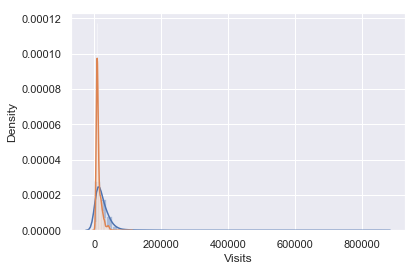

In [205]:
sns.distplot(data['Revenue'], label='Revenue')
sns.distplot(data['Visits'], label='Visits')

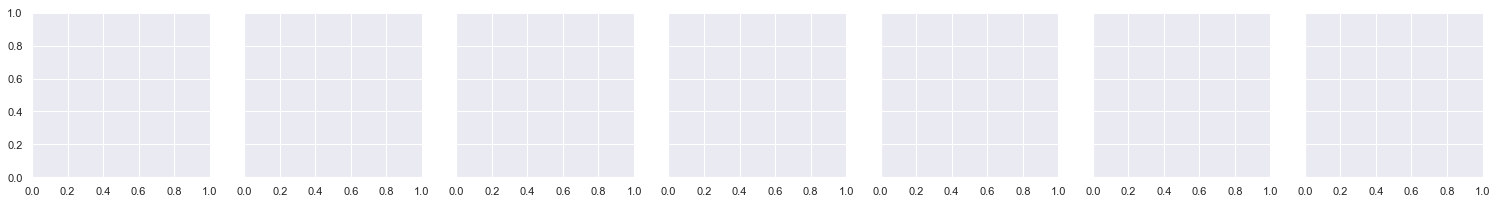

In [340]:
g = sns.FacetGrid(data, col='Year', aspect=1)

/home/dsc/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:216

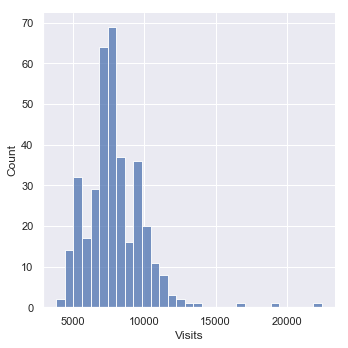

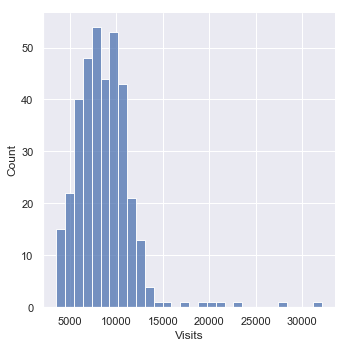

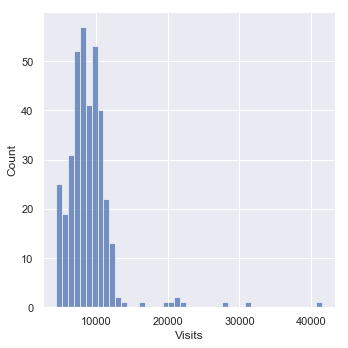

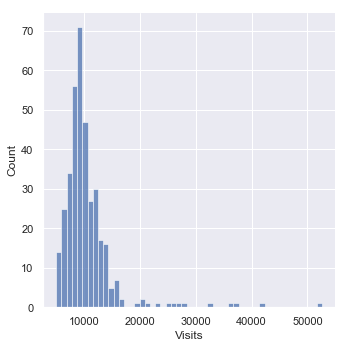

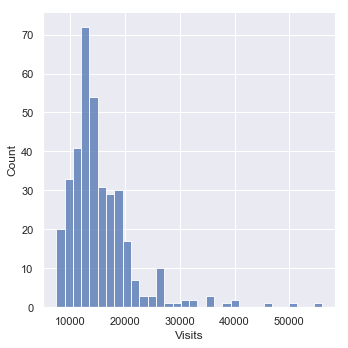

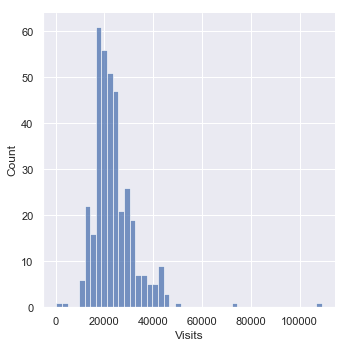

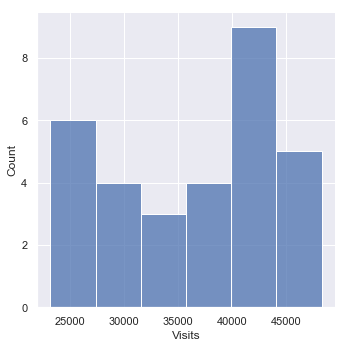

In [341]:
g = g.map(sns.displot, 'Visits');

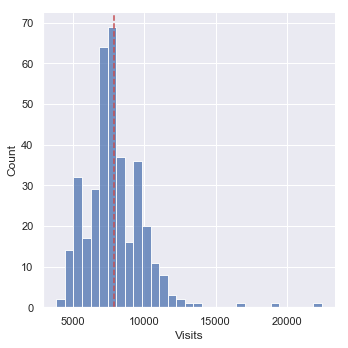

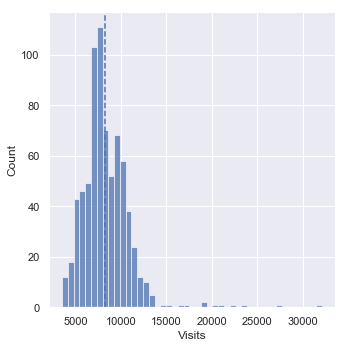

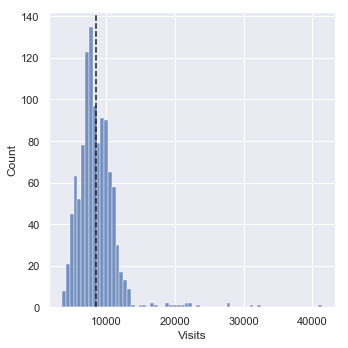

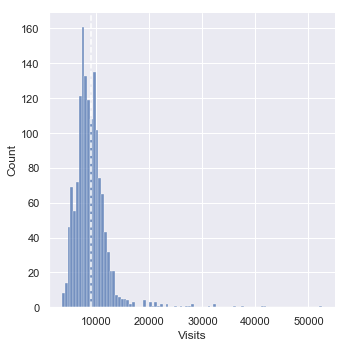

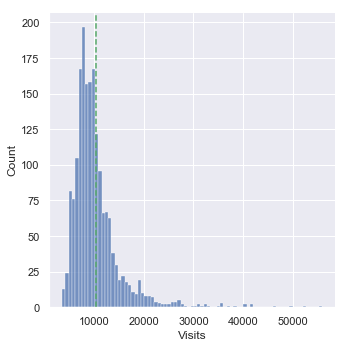

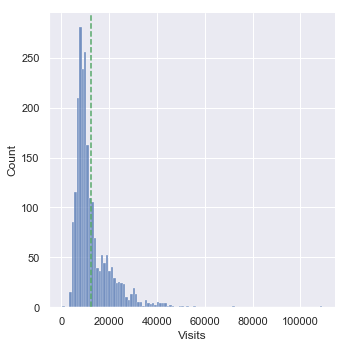

In [343]:
sns.displot(data[data['Year'] == 2015]['Visits'], label='Visits')
plt.axvline(data[data['Year'] == 2015]['Visits'].mean(), color="r", linestyle="--");
sns.displot(data[data['Year'] <= 2016]['Visits'], label='Visits')
plt.axvline(data[data['Year'] <= 2016]['Visits'].mean(), color="b", linestyle="--");
sns.displot(data[data['Year'] <= 2017]['Visits'], label='Visits')
plt.axvline(data[data['Year'] <= 2017]['Visits'].mean(), color="k", linestyle="--");
sns.displot(data[data['Year'] <= 2018]['Visits'], label='Visits')
plt.axvline(data[data['Year'] <= 2018]['Visits'].mean(), color="w", linestyle="--");
sns.displot(data[data['Year'] <= 2019]['Visits'], label='Visits')
plt.axvline(data[data['Year'] <= 2019]['Visits'].mean(), color="g", linestyle="--");
sns.displot(data[data['Year'] <= 2020]['Visits'], label='Visits')
plt.axvline(data[data['Year'] <= 2020]['Visits'].mean(), color="g", linestyle="--");